# Heart Disease Prediction Using ML:
### Dataset:  [Cleveland](https://drive.google.com/file/d/1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN/view)
### Algorithms:
- Naive Bayes
- K - Nearest Neigbors (KNN)
- Decision Tree
- Random Forest
- Adaboost
- Gradient Boost
- XGBoost
- Support Vector Machine (SVM)

# 1. Data Preparation

In [3]:
!gdown --id 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 25.8MB/s]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
datafile_path = 'cleveland.csv'
df = pd.read_csv(datafile_path)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [98]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((241, 13), (241,), (61, 13), (61,))

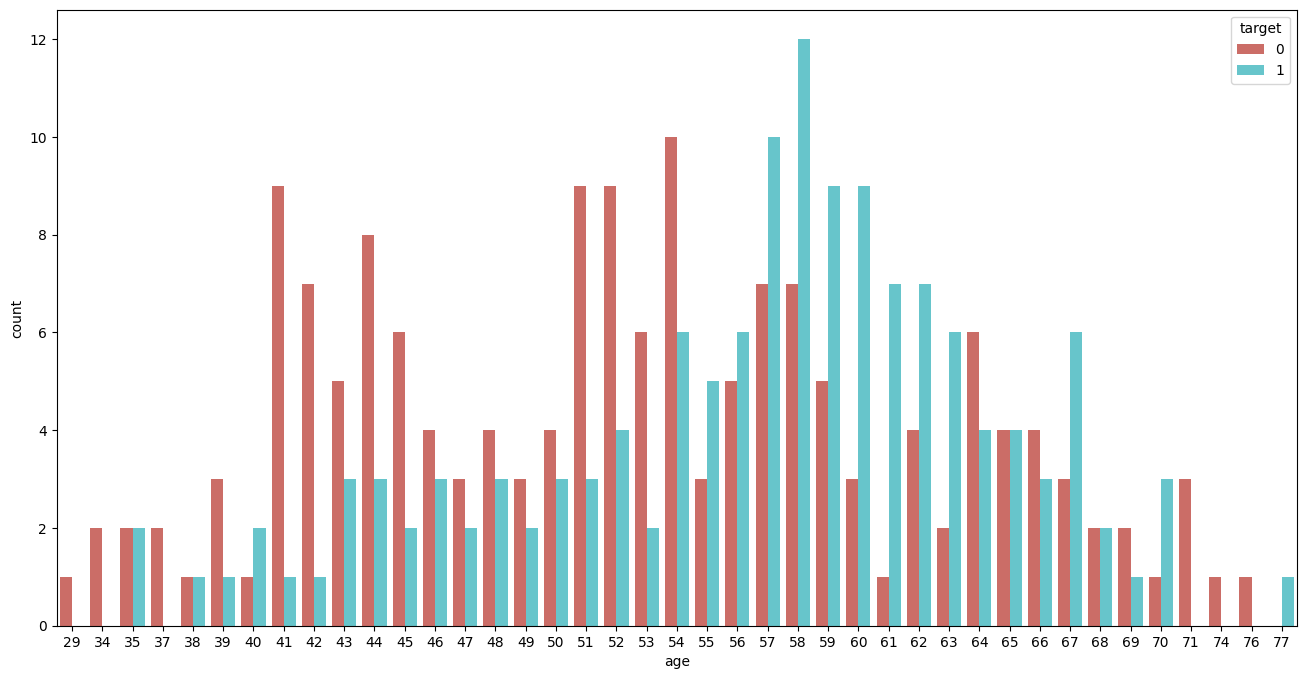

In [54]:
# distribution of target vs age
plt.figure(figsize=(16,8))
sns.countplot(x='age', hue='target', data=df, palette='hls')
plt.show()

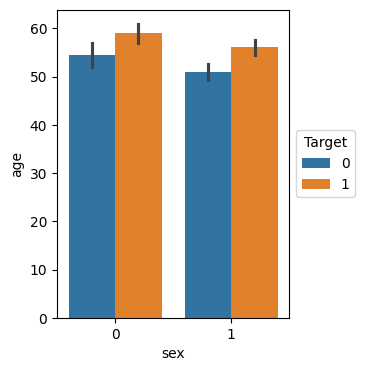

In [52]:
# Distribution of age and sex with target
plt.figure(figsize=(3,4))
sns.barplot(x='sex', y='age', hue='target', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Target')
plt.show()

## 2. Training and Prediction

### 2.1 Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [70]:
cm_train_nb = confusion_matrix(y_train, nb_classifier.predict(X_train))
cm_test_nb = confusion_matrix(y_test, nb_classifier.predict(X_test))
accuracy_train_nb = accuracy_score(y_train, nb_classifier.predict(X_train))
accuracy_test_nb = accuracy_score(y_test, nb_classifier.predict(X_test))
print(f'Train Accuracy for Naive Bayes: {accuracy_train_nb}')
print(f'Test Accuracy for Naive Bayes: {accuracy_test_nb}')
print(f'Train Confusion Matrix for Naive Bayes: \n{cm_train_nb}')
print(f'Test Confusion Matrix for Naive Bayes: \n{cm_test_nb}')

Train Accuracy for Naive Bayes: 0.8464730290456431
Test Accuracy for Naive Bayes: 0.8524590163934426
Train Confusion Matrix for Naive Bayes: 
[[116  15]
 [ 22  88]]
Test Confusion Matrix for Naive Bayes: 
[[29  3]
 [ 6 23]]


### 2.2 KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5
weight='uniform'
algorithms='auto'
leaf_size=30
p=2
metric='minkowski'

knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight, algorithm=algorithms, leaf_size=leaf_size, p=p, metric=metric)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
cm_train_knn = confusion_matrix(y_train, knn_classifier.predict(X_train))
cm_test_knn = confusion_matrix(y_test, knn_classifier.predict(X_test))
accuracy_train_knn = accuracy_score(y_train, knn_classifier.predict(X_train))
accuracy_test_knn = accuracy_score(y_test, knn_classifier.predict(X_test))
print(f'Train Accuracy for KNNClassifier: {accuracy_train_knn}')
print(f'Test Accuracy for KNNClassifier: {accuracy_test_knn}')
print(f'Train Confusion Matrix for KNNClassifier: \n{cm_train_knn}')
print(f'Test Confusion Matrix for KNNClassifier: \n{cm_test_knn}')

Train Accuracy for KNNClassifier: 0.7593360995850622
Test Accuracy for KNNClassifier: 0.6065573770491803
Train Confusion Matrix for KNNClassifier: 
[[102  29]
 [ 29  81]]
Test Confusion Matrix for KNNClassifier: 
[[18 14]
 [10 19]]


### 2.3 Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

criterion='gini'
max_depth=10
min_samples_split=2

dt_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, splitter=splitter)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [74]:
cm_train_dt = confusion_matrix(y_train, dt_classifier.predict(X_train))
cm_test_dt = confusion_matrix(y_test, dt_classifier.predict(X_test))
accuracy_train_dt = accuracy_score(y_train, dt_classifier.predict(X_train))
accuracy_test_dt = accuracy_score(y_test, dt_classifier.predict(X_test))
print(f'Train Accuracy for DecisionTreeClassifier: {accuracy_train_dt}')
print(f'Test Accuracy for DecisionTreeClassifier: {accuracy_test_dt}')
print(f'Train Confusion Matrix for DecisionTreeClassifier: \n{cm_train_dt}')
print(f'Test Confusion Matrix for DecisionTreeClassifier: \n{cm_test_dt}')

Train Accuracy for DecisionTreeClassifier: 1.0
Test Accuracy for DecisionTreeClassifier: 0.7868852459016393
Train Confusion Matrix for DecisionTreeClassifier: 
[[131   0]
 [  0 110]]
Test Confusion Matrix for DecisionTreeClassifier: 
[[25  7]
 [ 6 23]]


### 2.4 Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=10
criterion='gini'
max_depth=10
min_samples_split=2
random_state=42

rf_classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [76]:
cm_train_rf = confusion_matrix(y_train, rf_classifier.predict(X_train))
cm_test_rf = confusion_matrix(y_test, rf_classifier.predict(X_test))
accuracy_train_rf = accuracy_score(y_train, rf_classifier.predict(X_train))
accuracy_test_rf = accuracy_score(y_test, rf_classifier.predict(X_test))
print(f'Train Accuracy for RandomForestClassifier: {accuracy_train_rf}')
print(f'Test Accuracy for RandomForestClassifier: {accuracy_test_rf}')
print(f'Train Confusion Matrix for RandomForestClassifier: \n{cm_train_rf}')
print(f'Test Confusion Matrix for RandomForestClassifier: \n{cm_test_rf}')

Train Accuracy for RandomForestClassifier: 0.991701244813278
Test Accuracy for RandomForestClassifier: 0.7704918032786885
Train Confusion Matrix for RandomForestClassifier: 
[[131   0]
 [  2 108]]
Test Confusion Matrix for RandomForestClassifier: 
[[26  6]
 [ 8 21]]


### 2.5 AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators=50
learning_rate=1.0

ada_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [81]:
cm_train_ada = confusion_matrix(y_train, ada_classifier.predict(X_train))
cm_test_ada = confusion_matrix(y_test, ada_classifier.predict(X_test))
accuracy_train_ada = accuracy_score(y_train, ada_classifier.predict(X_train))
accuracy_test_ada = accuracy_score(y_test, ada_classifier.predict(X_test))
print(f'Train Accuracy for AdaBoostClassifier: {accuracy_train_ada}')
print(f'Test Accuracy for AdaBoostClassifier: {accuracy_test_ada}')
print(f'Train Confusion Matrix for AdaBoostClassifier: \n{cm_train_ada}')
print(f'Test Confusion Matrix for AdaBoostClassifier: \n{cm_test_ada}')

Train Accuracy for AdaBoostClassifier: 0.941908713692946
Test Accuracy for AdaBoostClassifier: 0.7868852459016393
Train Confusion Matrix for AdaBoostClassifier: 
[[126   5]
 [  9 101]]
Test Confusion Matrix for AdaBoostClassifier: 
[[25  7]
 [ 6 23]]


### 2.6 Gradient Boost

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators=100
learning_rate=1.0
max_depth=3
subsample=1.0
random_state=42
min_samples_split=2

graboost_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsample, random_state=random_state, min_samples_split=min_samples_split)
graboost_classifier.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [84]:
cm_train_graboost = confusion_matrix(y_train, graboost_classifier.predict(X_train))
cm_test_graboost = confusion_matrix(y_test, graboost_classifier.predict(X_test))
accuracy_train_graboost = accuracy_score(y_train, graboost_classifier.predict(X_train))
accuracy_test_graboost = accuracy_score(y_test, graboost_classifier.predict(X_test))
print(f'Train Accuracy for GradientBoostingClassifier: {accuracy_train_graboost}')
print(f'Test Accuracy for GradientBoostingClassifier: {accuracy_test_graboost}')
print(f'Train Confusion Matrix for GradientBoostingClassifier: \n{cm_train_graboost}')
print(f'Test Confusion Matrix for GradientBoostingClassifier: \n{cm_test_graboost}')

Train Accuracy for GradientBoostingClassifier: 1.0
Test Accuracy for GradientBoostingClassifier: 0.8032786885245902
Train Confusion Matrix for GradientBoostingClassifier: 
[[131   0]
 [  0 110]]
Test Confusion Matrix for GradientBoostingClassifier: 
[[25  7]
 [ 5 24]]


### 2.7 XGBoost

In [86]:
from xgboost import XGBClassifier

n_estimators=100
random_state=42
objective='binary:logistic'

xgb_classifier = XGBClassifier(n_estimators=n_estimators, random_state=random_state, objective=objective)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [92]:
cm_train_xgb = confusion_matrix(y_train, xgb_classifier.predict(X_train))
cm_test_xgb = confusion_matrix(y_test, xgb_classifier.predict(X_test))
accuracy_train_xgb = accuracy_score(y_train, xgb_classifier.predict(X_train))
accuracy_test_xgb = accuracy_score(y_test, xgb_classifier.predict(X_test))
print(f'Train Accuracy for XGBClassifier: {accuracy_train_xgb}')
print(f'Test Accuracy for XGBClassifier: {accuracy_test_xgb}')
print(f'Train Confusion Matrix for XGBClassifier: \n{cm_train_xgb}')
print(f'Test Confusion Matrix for XGBClassifier: \n{cm_test_xgb}')

Train Accuracy for XGBClassifier: 1.0
Test Accuracy for XGBClassifier: 0.8688524590163934
Train Confusion Matrix for XGBClassifier: 
[[131   0]
 [  0 110]]
Test Confusion Matrix for XGBClassifier: 
[[27  5]
 [ 3 26]]


### 2.8 SVM

In [64]:
from sklearn.svm import SVC

kernel = 'rbf'
random_state = 42
svm_classifier = SVC(kernel=kernel, random_state=random_state)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [66]:
cm_train_svm = confusion_matrix(y_train, svm_classifier.predict(X_train))
cm_test_svm = confusion_matrix(y_test, svm_classifier.predict(X_test))
accuracy_train_svm = accuracy_score(y_train, svm_classifier.predict(X_train))
accuracy_test_svm = accuracy_score(y_test, svm_classifier.predict(X_test))
print(f'Train Accuracy for SVMClassifier: {accuracy_train_svm}')
print(f'Test Accuracy for SVMClassifier: {accuracy_test_svm}')
print(f'Train Confusion Matrix for SVMClassifier: \n{cm_train_svm}')
print(f'Test Confusion Matrix for SVMClassifier: \n{cm_test_svm}')

Train Accuracy for SVMClassifier: 0.6680497925311203
Test Accuracy for SVMClassifier: 0.6721311475409836
Train Confusion Matrix for SVMClassifier: 
[[113  18]
 [ 62  48]]
Test Confusion Matrix for SVMClassifier: 
[[27  5]
 [15 14]]


### 2.9 Staking

In [99]:
from sklearn.ensemble import StackingClassifier

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
ad = AdaBoostClassifier(random_state=42)
estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]
clf = StackingClassifier(estimators=estimators, final_estimator=xgb)
clf.fit(X_train, y_train)



StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [101]:
cm_train_stack = confusion_matrix(y_train, clf.predict(X_train))
cm_test_stack = confusion_matrix(y_test, clf.predict(X_test))
accuracy_train_stack = accuracy_score(y_train, clf.predict(X_train))
accuracy_test_stack = accuracy_score(y_test, clf.predict(X_test))
print(f'Train Accuracy for StackingClassifier: {accuracy_train_stack}')
print(f'Test Accuracy for StackingClassifier: {accuracy_test_stack}')
print(f'Train Confusion Matrix for StackingClassifier: \n{cm_train_stack}')
print(f'Test Confusion Matrix for StackingClassifier: \n{cm_test_stack}')

Train Accuracy for StackingClassifier: 0.9585062240663901
Test Accuracy for StackingClassifier: 0.7377049180327869
Train Confusion Matrix for StackingClassifier: 
[[125   6]
 [  4 106]]
Test Confusion Matrix for StackingClassifier: 
[[27  5]
 [11 18]]
